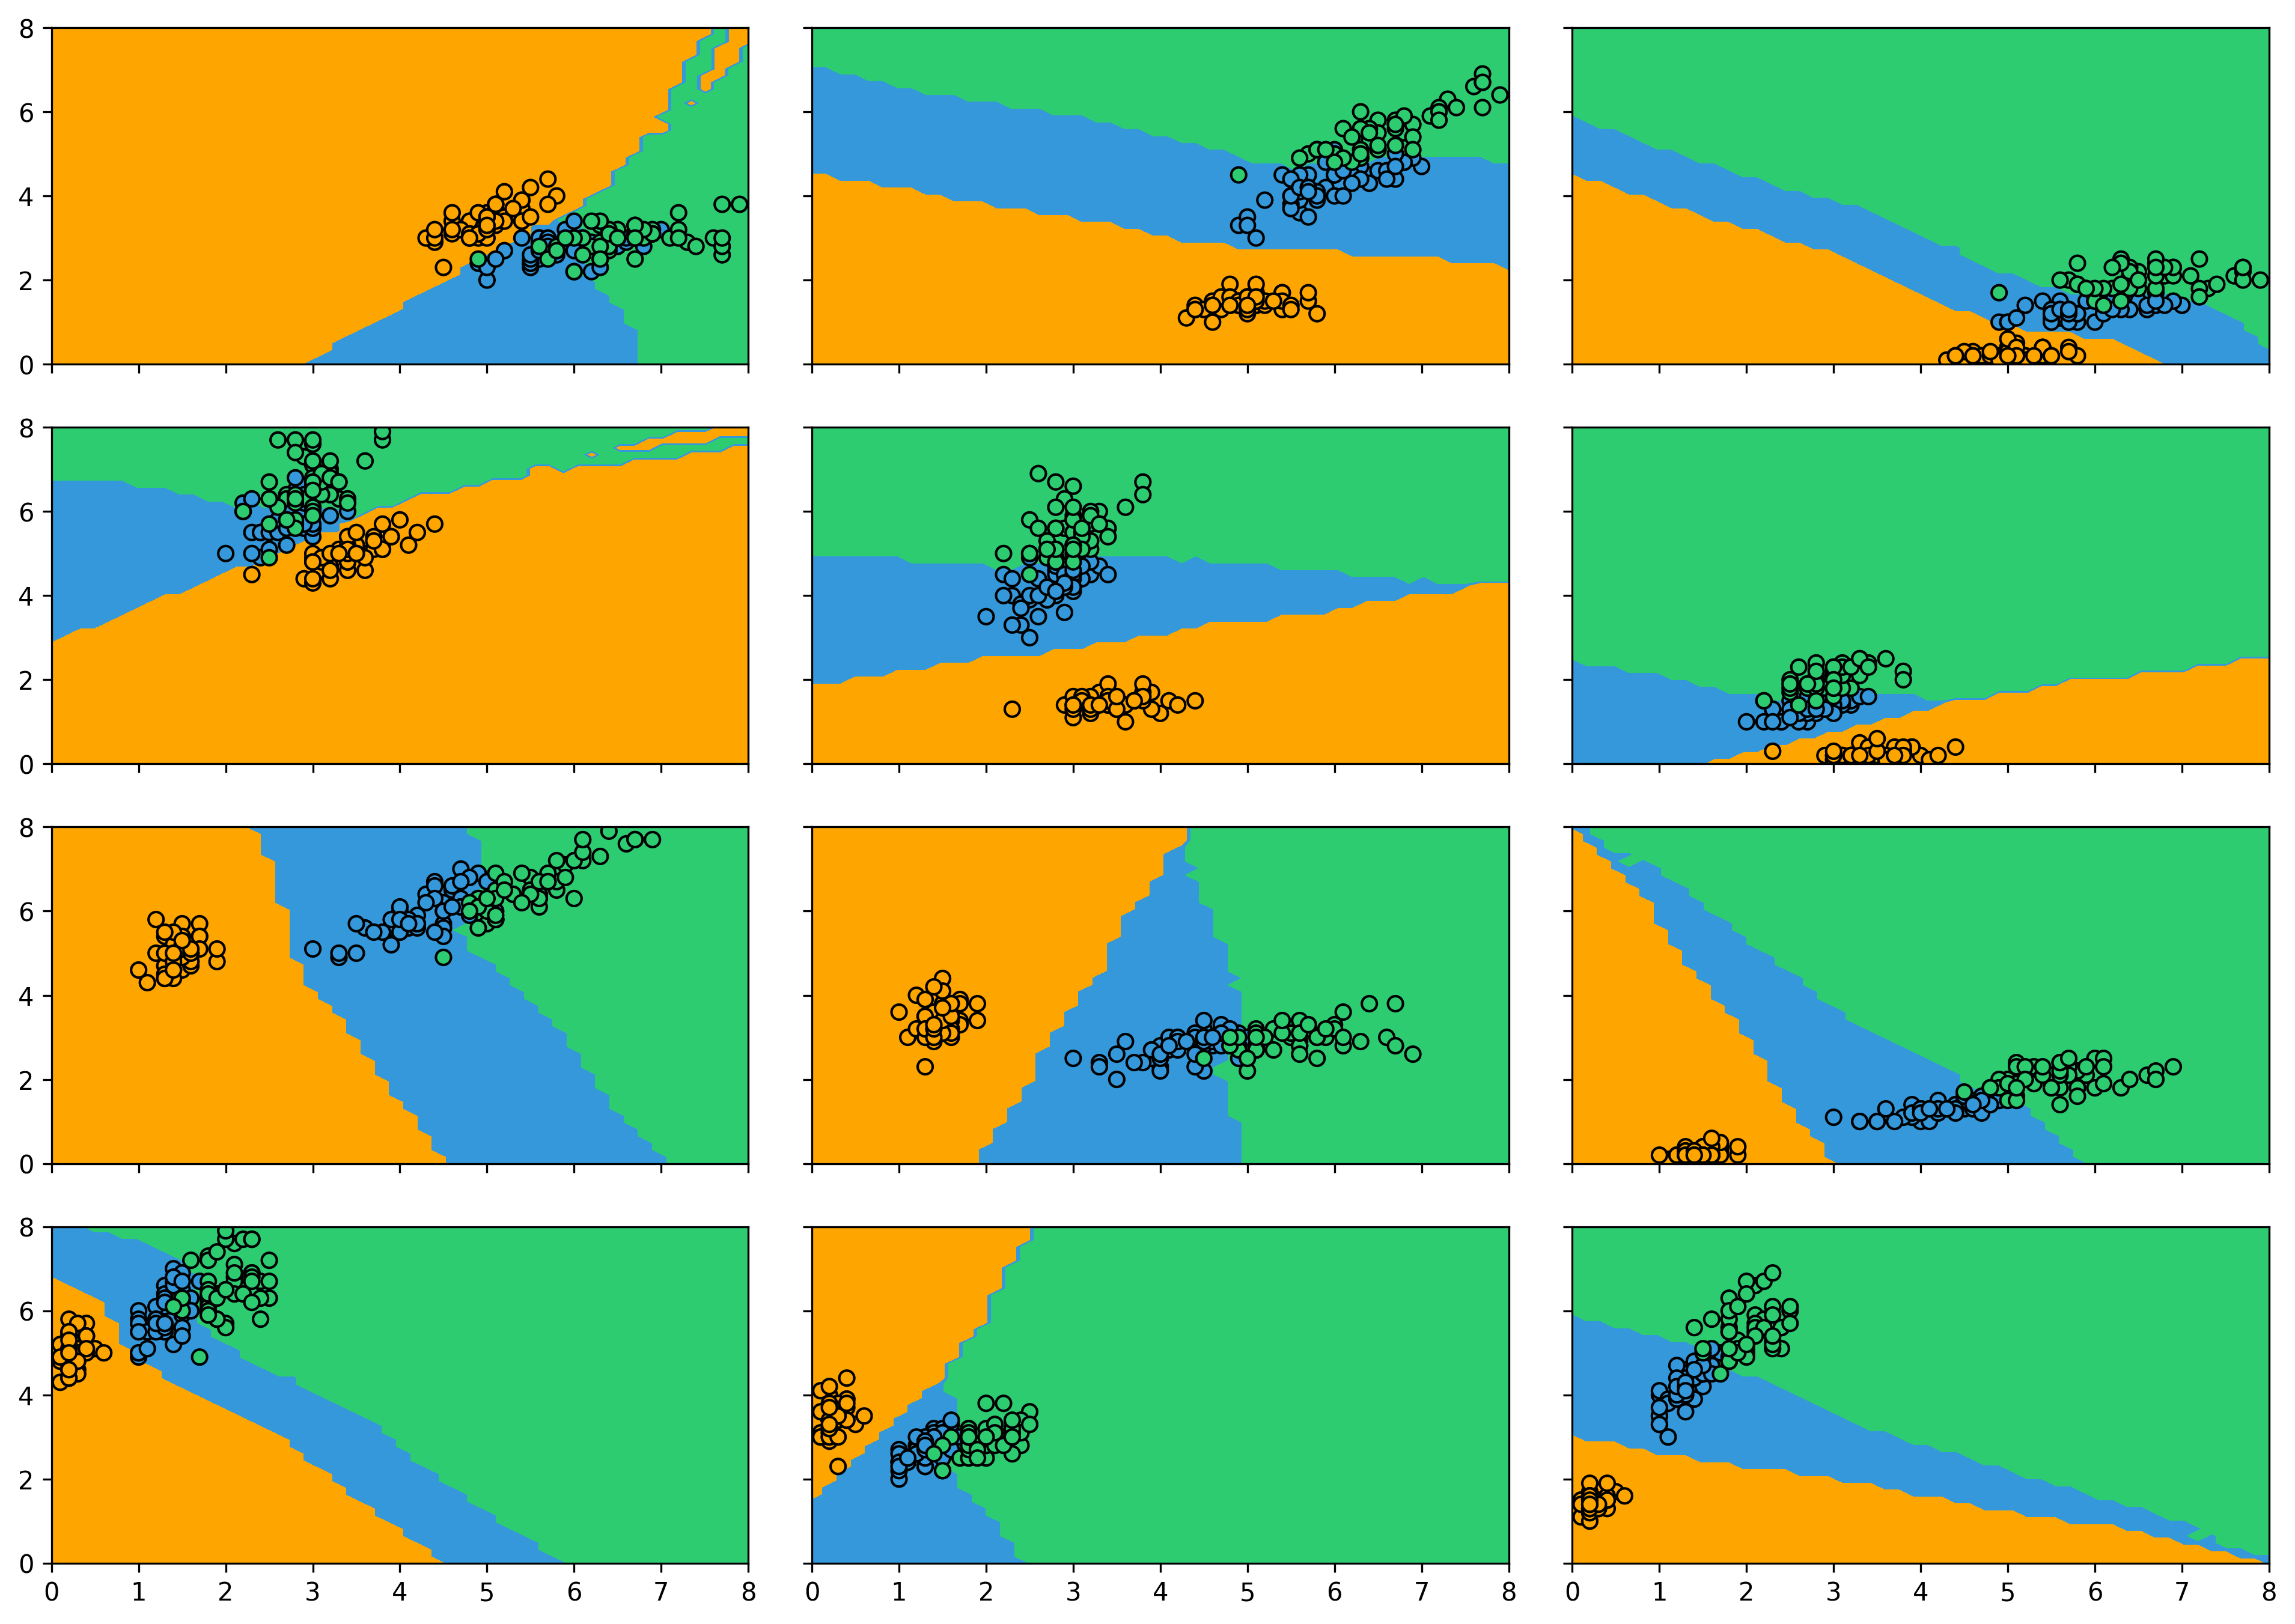

In [2]:
import matplotlib.pyplot as plt
import altair as alt
from sklearn import neighbors, datasets
import numpy as np
import pandas as pd
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap
import itertools as it
from timeit import timeit
import warnings

warnings.filterwarnings("ignore")

k = 15

iris = datasets.load_iris()

cmap = ListedColormap(["orange", "#3498db", "#2ecc71"])
l = [t for t in list(it.product(range(4), range(4))) if t[0] != t[1]]
f, axes = plt.subplots(4, 3, sharex=True, sharey=True)
f.set_dpi(300)
f.tight_layout(h_pad=0, w_pad=-0.5)
f.set_size_inches(14, 10)

for (i, j), ax in zip(l, axes.flat):
    X = iris.data[:, [i, j]]
    y = iris.target

    clf = neighbors.KNeighborsClassifier(k)
    xx0, xx1 = np.meshgrid(np.linspace(0, 8), np.linspace(0, 8))
    g = np.vstack([xx0.ravel(), xx1.ravel()]).T
    clf.fit(X, y)
    r = clf.predict(g).reshape(xx0.shape)
    d = DecisionBoundaryDisplay(xx0=xx0, xx1=xx1, response=r)
    d.plot(ax=ax, cmap=cmap)
    # p = DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cmap, ax=ax)
    d.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k", cmap=cmap)

In [3]:
def f(n, algorithm):
    X = iris.data[:, [0, 1]]
    y = iris.target
    idx = np.random.choice(len(iris.target), n, replace=True)
    X = X[idx]
    y = y[idx]
    clf = neighbors.KNeighborsClassifier(k, algorithm=algorithm)
    clf.fit(X, y)
    clf.predict(X)

algorithms = (
    "brute",
    "kd_tree"
)

lengths = list(range(1000, 50000, 10000))

df = pd.DataFrame({**{
    a: [timeit(lambda: f(n, a), number=10) for n in lengths]
    for a in algorithms
}, "n": lengths})

df = df.reset_index().melt(id_vars="n", value_vars=algorithms)
df = df.rename(columns={"variable": "Function", "value": "Time", "n": "Number of Rows"})

alt.Chart(df).mark_line().encode(
    x="Number of Rows",
    y="Time",
    color="Function"
)

alt.Chart(...)